# OpenCV (Open Source Computer Vision Library)

OpenCV is an open source image manipulation library focused on computer vision and real-time image processing. It is written in C/C++, and is also available in Python through the library wrapper. The library for using OpenCV in Python is [opencv-python](https://github.com/skvark/opencv-python) ([tutorial](https://docs.opencv.org/master/d6/d00/tutorial_py_root.html)).

In [1]:
import cv2 as cv 
import numpy as np 
import matplotlib.pyplot as plt 

plt.rcParams['figure.figsize'] = [10, 10] 
plt.rcParams['figure.dpi'] = 80 

## Loading an image from a file

Fuction for the reading of the image from the file cv.[imread(...)](https://docs.opencv.org/4.4.0/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56) (supported formats are listed in the referenced documentation). To save the image to the file is possible by the function cv.[imwrite(...)](https://docs.opencv.org/master/d4/da8/group__imgcodecs.html#gabbc7ef1aa2edfaa87772f1202d67e0ce)

In [2]:
img = cv.imread('./data/2_foto.jpg') 

In [3]:
print("The return type from cv.imread is:", type(img))

The return type from cv.imread is: <class 'numpy.ndarray'>


The loaded image is in the format [numpy.ndarray](https://numpy.org/doc/stable/reference/generated/numpy.array.html). Numpy array is the standard used by the vast majority of other libraries. It is an array that is created in memory, and is also worked with, like an array in the C language. Working with it is thus much more efficient both in terms of speed and occupied memory. However, unlike a python list, it can only contain values of one type. At the same time, it is necessary to avoid adding values to the array in loops, when it is necessary, as in e.g. matlab, to first create the entire field and then write the calculated values into it (preallocate the necessary memory). Numpy also brings more types of numeric variables (especially different bit lengths).

In [4]:
print('Dimensions: {}'.format(img.ndim))
print('Shape: {}'.format(img.shape))
print('Byte size: {} B'.format(img.size))
print('Data type: {}'.format(img.dtype))

Dimensions: 3
Shape: (425, 921, 3)
Byte size: 1174275 B
Data type: uint8


The loaded image is a three-dimensional array (*ndarray.ndim* attribute). The first dimension is the rows, the second is the columns, and the third is the image color channels of the **BGR** format. The size of all dimensions are the *ndarray.shape* (tuple) attribute. The number of bytes occupied by the array in memory is stored in the *ndarray.size* attribute. The data type are in *uint8* format, i.e. 8-bit unsigned integer, 1 byte encoding values 0-255.

The OpenCV library includes its own interface for image rendering. However, this renders the image in a separate window, which is unusable for server-side use (as in this case using Jupyter Hub).

We will use the matplotlib library to plot the image. There is a function in the pyplot sublibrary to render an image plt.[imshow(...)](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.imshow.html).

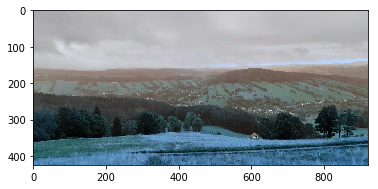

In [5]:
plt.imshow(img)

The image was rendered, but since it is an autumn landscape, the colors do not correspond to it. This is because the function plt.[imshow](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.imshow.html) assumes a color image in **RGB** format, while the function cv2 .[imread(...)](https://docs.opencv.org/4.4.0/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56) returns an array in **BGR** color channel order. So let's define a function that flips the channel order from BGR to RGB:

In [6]:
def bgr2rgb(bgr_image):
    b,g,r = cv.split(bgr_image) 
    return cv.merge([r,g,b]) 

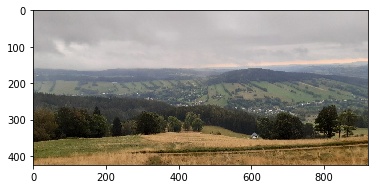

In [7]:
plt.imshow(bgr2rgb(img))

After switching the channels, the picture is displayed correctly. Individual color components can be rendered using the same function, but using only one color channel. To display the channel in the corresponding color, you need to pass the *cmap* argument to the *plt.imread(...)* function ([colormap](https://matplotlib.org/3.3.2/tutorials/colors/colormaps.html)) .


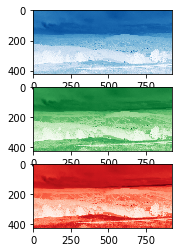

In [8]:
plt.subplot(311)
plt.imshow(img[:,:,0], cmap='Blues')
plt.subplot(312)
plt.imshow(img[:,:,1], cmap='Greens')
plt.subplot(313)
plt.imshow(img[:,:,2], cmap='Reds')

## Conversions between color space formats
The function cv.[cvtColor(...)](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab) is used to convert between different image color space formats, whose required arguments are the image that is to be converted and [conversion code](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html#ga4e0972be5de079fed4e3a10e24ef5ef0).

For example, the code cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) is for the convertion of the *BGR* image to grayscale. The conversion algorithm is documented [here](https://docs.opencv.org/3.4/de/d25/imgproc_color_conversions.html)

In [9]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

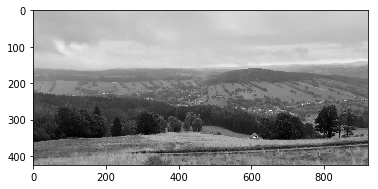

In [10]:
plt.imshow(gray[:,:], cmap='gray') 

### Other color spaces are e.g.: 

### [*HSV*](https://docs.opencv.org/3.4/de/d25/imgproc_color_conversions.html#color_convert_rgb_hsv) (Hue, Saturation, Value{Brightness}):

![image](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4e/HSV_color_solid_cylinder.png/300px-HSV_color_solid_cylinder.png)


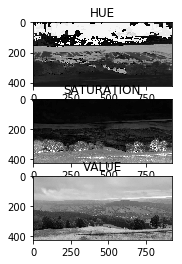

In [12]:
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
plt.subplot(311)
plt.imshow(hsv[:,:,0], cmap='gray')
plt.title('HUE')
plt.subplot(312)
plt.imshow(hsv[:,:,1], cmap='gray')
plt.title('SATURATION')
plt.subplot(313)
plt.imshow(hsv[:,:,2], cmap='gray')
plt.title('VALUE');

### [*HLS*](https://docs.opencv.org/3.4/de/d25/imgproc_color_conversions.html#color_convert_rgb_hls) (Hue, Lightness, Saturation):
![image](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6b/HSL_color_solid_cylinder_saturation_gray.png/296px-HSL_color_solid_cylinder_saturation_gray.png)


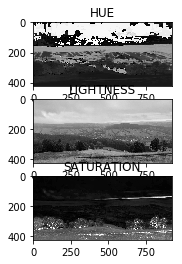

In [13]:
hls = cv.cvtColor(img, cv.COLOR_BGR2HLS)
plt.subplot(311)
plt.imshow(hls[:,:,0], cmap='gray')
plt.title('HUE')
plt.subplot(312)
plt.imshow(hls[:,:,1], cmap='gray')
plt.title('LIGHTNESS')
plt.subplot(313)
plt.imshow(hls[:,:,2], cmap='gray')
plt.title('SATURATION');

### [*CIELAB*](https://docs.opencv.org/3.4/de/d25/imgproc_color_conversions.html#color_convert_rgb_lab) L=lightness, a=axis green(-a) red(+a), b=axis blue(-b) yelow(+b)
![image](https://www.researchgate.net/profile/Sandra-Bino/publication/338303610/figure/fig1/AS:845707615428619@1578643816783/The-CIELAB-color-space-diagram-The-CIELAB-or-CIE-L-a-b-color-system-represents_W640.jpg)

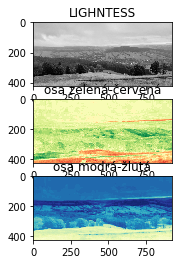

In [14]:
lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
plt.subplot(311)
plt.imshow(lab[:,:,0], cmap='gray')
plt.title('LIGHNTESS')
plt.subplot(312)
plt.imshow(lab[:,:,1], cmap='RdYlGn_r')
plt.title('osa zelená-červená')
plt.subplot(313)
plt.imshow(lab[:,:,2], cmap='YlGnBu_r')
plt.title('osa modrá-žlutá');

### [*CIELUV*](https://docs.opencv.org/3.4/de/d25/imgproc_color_conversions.html#color_convert_rgb_luv) L=lightness, u v are coordinates in chromaticity diagram ![image](https://upload.wikimedia.org/wikipedia/commons/thumb/8/83/CIE_1976_UCS.png/1024px-CIE_1976_UCS.png)

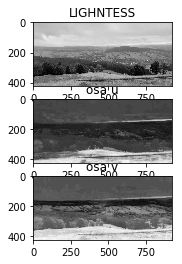

In [15]:
luv = cv.cvtColor(img, cv.COLOR_BGR2LUV)
plt.subplot(311)
plt.imshow(luv[:,:,0], cmap='gray')
plt.title('LIGHNTESS')
plt.subplot(312)
plt.imshow(luv[:,:,1], cmap='gray')
plt.title('osa u')
plt.subplot(313)
plt.imshow(luv[:,:,2], cmap='gray')
plt.title('osa v');

All these color spaces have an advantage over RGB(BGR) in the separation of the color component and **brightness**, which facilitates both image pre-processing (e.g. changing color representation without affecting brightness) and brings additional possibilities in image analysis.

## Histogram

It visualizes the representation of the values 0-255 of individual pixels in the image. The range 0-255 is evenly divided into 256 bins, and the pixels are sorted into bins.


In [ ]:
color = ('b','g','r') # tuple kódů barev pro matplotlib

for i, col in enumerate(color): 
    histr = cv.calcHist([img], [i], None, [256], [0,256])
                                                        
    plt.plot(histr, color = col) 
    
plt.hist(img.ravel(), 256, [0,256]) 
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) 
histr, _ = np.histogram(gray.ravel(), 256, [0,256])
plt.plot(histr, 'k')
plt.xlim([0,256]);

From the histogram we can calculate the **CDF** (Cumulative Distribution Function)

In [ ]:
color = ('b','g','r')

for i, col in enumerate(color):
    histr = cv.calcHist([img], [i], None, [256], [0,256])
                                                         
    plt.plot(np.cumsum(histr), color = col) 
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) 
histr, _ = np.histogram(gray.ravel(), 256, [0,256]) 
plt.plot(np.cumsum(histr), 'k') 
plt.xlim([0,256]); 

## Image transformation

### Resize [cv.resize(...)](https://docs.opencv.org/4.4.0/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d)

The interpolation function used by the resize algorithm is given by flag from [list](https://docs.opencv.org/4.4.0/da/d54/group__imgproc__transform.html#ga5bb5a1fea74ea38e1a5445ca803ff121)

In [ ]:
img_half = cv.resize(img, (int(img.shape[1]/6), int(img.shape[0]/6)),  interpolation = cv.INTER_LINEAR)
plt.imshow(bgr2rgb(img_half))

### Move

To move the image, we need to define a translation matrix and then apply the affine transformation defined by this matrix with a function cv.[warpAffine(...)](https://docs.opencv.org/4.4.0/da/d54/group__imgproc__transform.html#ga0203d9ee5fcd28d40dbc4a1ea4451983)

In [ ]:

(h, w) = img.shape[:2] 

M = np.float32([[1, 0, 100], 
                [0, 1, 50]])
img_tr = cv.warpAffine(img, M, (w,h))

plt.imshow(bgr2rgb(img_tr))

### Rotation 

For rotation, we need the transformation matrix of the affine mapping that could be calculated using the function cv.[getRotationMatrix(...)](https://docs.opencv.org/4.4.0/da/d54/group__imgproc__transform.html#gafbbc470ce83812914a70abfb604f4326) and then apply the affine transformation with a function cv.[warpAffine(...)](https://docs.opencv.org/4.4.0/da/d54/group__imgproc__transform.html#ga0203d9ee5fcd28d40dbc4a1ea4451983)

In [ ]:

(h, w) = img.shape[:2] 
(cX, cY) = (w // 2, h // 2) # center of rotation
M = cv.getRotationMatrix2D((cX, cY), -45, 1.0) # center of operation, rotation, scale
img_rt = cv.warpAffine(img, M, (w, h))
plt.imshow(bgr2rgb(img_rt))

The result is a rotated image, but with the loss of the edges that got outside the original image by rotation. If we want to see the whole picture, we have to calculate the new size of the canvas, the new center of the picture, and modify the transformation matrix with it (add move to rotation)

In [ ]:
(h, w) = img.shape[:2] 
(cX, cY) = (w // 2, h // 2)
M = cv.getRotationMatrix2D((cX, cY), -45, 1.0)
cos = np.abs(M[0, 0])
sin = np.abs(M[0, 1])
# new canvas shape
nW = int((h * sin) + (w * cos))
nH = int((h * cos) + (w * sin))
# add move to rotation matrix
M[0, 2] += (nW / 2) - cX
M[1, 2] += (nH / 2) - cY

img_rt = cv.warpAffine(img, M, (nW, nH))
plt.imshow(bgr2rgb(img_rt))

## Profile line

Plot pixel values along a specified segment.

In OpenCV, this operation is implemented in the LineIterator function, but it is not implemented in the opencv-python library. We can do the same operation using a library [scikit-image](https://scikit-image.org/):

In [ ]:
from skimage.measure import profile_line 

In [ ]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) 
print(gray.shape)

In [ ]:
p = profile_line(gray, [200, 0], [200, 920]) 

In [ ]:
plt.plot(p); 